In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from QuantileCompression import QuantileCompression as qc

In [2]:
# initialize qc for precipitation which is zero inflated
# qc_precip = qc(zero_inflated=True)

# initialize qc for temperature data which leaves out first 4 quantile levels
qc_temp = qc(shift=4)

In [3]:
# read in grib data from local file path; note that precipitation data is masked via mask_data parameter
# qc_precip.read_data(file_path='data/20220324/blend20220324.t12z.qmd.f018.co.grib2', msg_start=2, mask_data=True)
qc_temp.read_data(file_path='data/20220324/blend20220324.t12z.qmd.f018.co.grib2', msg_start=213)

In [4]:
# data is compressed using method compress_data with parameter compress_type being either 'unif' (default) for unifomrly spaced nodes, 'var' for variably spaced nodes using unconstrained approach, 'var_const' for
# variably spaced nodes using constrained approach, or 'adapt' using a mix of methods according to whichever method either meets error tolerance or has minimum mean absolute error

# two lines below is the code originally ran to produce compressed data - takes some time
# compressed_precip = qc_precip.compress_data(compress_type='adapt')
# compressed_temp = qc_temp.compress_data(compress_type='adapt')

#compressed_precip = np.load('compressed_precip', allow_pickle=True)
compressed_temp = np.load('compressed_temp', allow_pickle=True)

In [5]:
# decompress compressed data
# decompressed_precip = qc_precip.decompress_data(compressed_precip)
decompressed_temp = qc_temp.decompress_data(compressed_temp)

In [6]:
# printing error summaries
# qc_precip.error_summaries(decompressed_precip)
qc_temp.error_summaries(decompressed_temp)

max absolute error = 0.18458506125173288
max mean absolute error over grid = 0.009857515484109694
max mean squared error over grid = 0.0009803051037624432
average max absolute error over grid = 0.06241556994714556
average mean absolute error over grid = 0.0011142597325450086
average mean squared error over grid = 3.019264870296931e-05


In [7]:
# setting idx for viewing data
# idx_precip = np.where(qc_precip.data[-1,:,:] != 0)
idx_temp = np.where(qc_temp.data[-1,:,:] != 0)

In [8]:
# plot original vs approximate data for precipitation at random grid points
# n = np.random.randint(0, idx_precip[0].shape[0]-1)
# i = idx_precip[0][n]
# j = idx_precip[1][n]
# while qc_precip.mask[-1,i,j] != 0:
#     n = np.random.randint(0, idx_precip[0].shape[0]-1)
#     i = idx_precip[0][n]
#     j = idx_precip[1][n]
# qs = np.linspace(1,99,99)/100
# plt.plot(qs, qc_precip.data[:,i,j], c='xkcd:black', label='orig')
# plt.plot(qs, decompressed_precip[:,i,j], c='xkcd:red', label='approx')
# plt.legend()

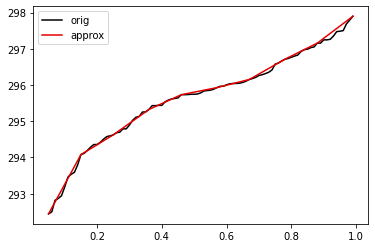

In [11]:
# plot original vs approximate data for temperature at random grid points
n = np.random.randint(0, idx_temp[0].shape[0]-1)
i = idx_temp[0][n]
j = idx_temp[1][n]
qs = np.linspace(1,99,99)[qc_temp.shift:]/100
plt.plot(qs, qc_temp.data[:,i,j], c='xkcd:black', label='orig')
plt.plot(qs, decompressed_temp[:,i,j], c='xkcd:red', label='approx')
plt.legend()